## **Importing Libraries**

In [ ]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 
import plotly.express as px
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **Reading the dataset**

In [ ]:
#Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/satwik-murarka/DS203/main/dataset.csv")

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## **Features:**

### **Time and Sites Information:**



*   Administrative (numeric)
*   Administrative_Duration (numeric)
*   Informational (numeric)
*   Informational_Duration (numeric)
*   ProductRelated (numeric)
*   ProductRelated_Duration (numeric)

### **Google Analytics Metrics:**

*   BounceRates (numeric)
*   ExitRates (numeric)
*   PageValues (numeric)

### **User Specific:**

*   Month (categorical)
*   Special Day (categorical)
*   OperatingSystem (categorical)
*   Browser (categorical)
*   Region (categorical)
*   Weekend (boolean)
*   TrafficType (categorical)
*   VisitorType (categorical)

### **Class Label**

*   Revenue (boolean)







## **Descriptive Statistics**

In [ ]:
#Checking the datatypes of the features
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
#Checking for null/missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

As we can see the dataset **does not** contain any missing or null values.

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.154745,0.035118,0.140065,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.361676,0.184084,0.347068,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Finding number of unique values in each categorical variable
cols = ["OperatingSystems","Browser","Region","TrafficType","VisitorType",
        "Weekend","Revenue","Administrative","Informational","ProductRelated","Month"]

print("Number of unique values in Categorical features:\n")
for col in cols:
  print(f"{col}:{df[col].nunique()}\n")

Number of unique values in Categorical features:

OperatingSystems:8

Browser:13

Region:9

TrafficType:20

VisitorType:3

Weekend:2

Revenue:2

Administrative:27

Informational:17

ProductRelated:311

Month:10



## **Exploratory Data Analysis**



### **Categorical/Discrete Variables**

In [ ]:
#Function for countplot of categorical variables
def count_barplot(df,col):
  plt.figure(figsize=(8,6))
  plt.title(f"CountPlot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  sns.countplot(x = col , data = df)
  plt.show()
  print("Number in each Category:")
  print(df[col].value_counts())
  print(u'\u2500' * 10)
  print("Percentage of each category:")
  print(df[col].value_counts(normalize=True)*100)
  

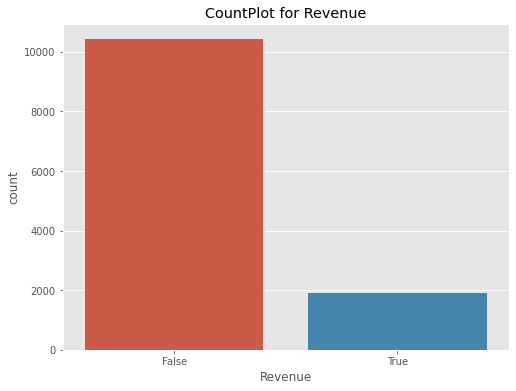

Number in each Category:
False    10422
True      1908
Name: Revenue, dtype: int64
──────────
Percentage of each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [ ]:
count_barplot(df,"Revenue")

The number of False cases is greater than the number of True cases. Hence, the datastet is **imbalanced**. We can also conclude that out of the total customers only **15.47%** ended up with shopping.

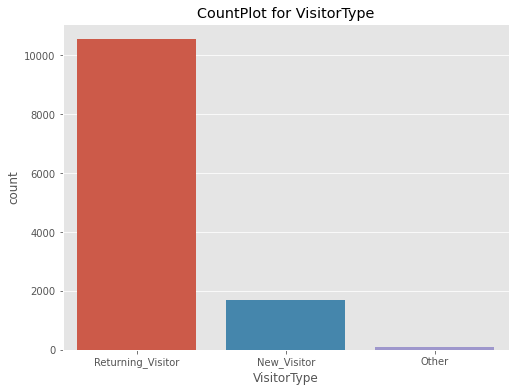

Number in each Category:
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
──────────
Percentage of each category:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


In [ ]:
count_barplot(df,"VisitorType")

Around **85.57%** of visitors are returning. This means the site has good retention rate but has failed to attract new visitors.

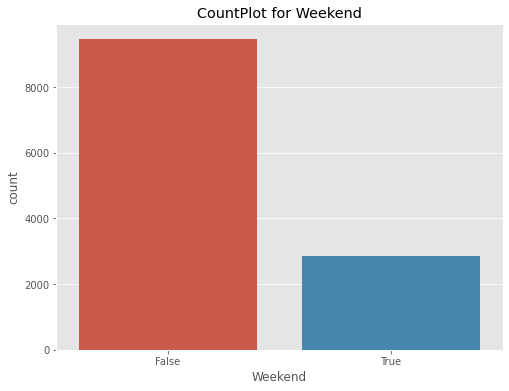

Number in each Category:
False    9462
True     2868
Name: Weekend, dtype: int64
──────────
Percentage of each category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


In [ ]:
count_barplot(df,"Weekend")

The percentage of people visiting on weekends is **23.26%**. This implies that there is no preference for visitng the site on weekends and it is almost uniform across all days.

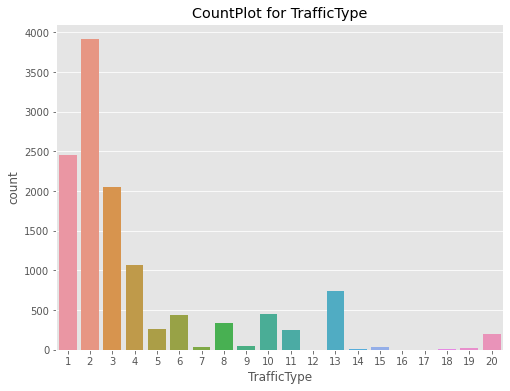

Number in each Category:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
──────────
Percentage of each category:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


In [ ]:
count_barplot(df,"TrafficType")

**66%** of the traffic comes from traffic type 1,2 and 3

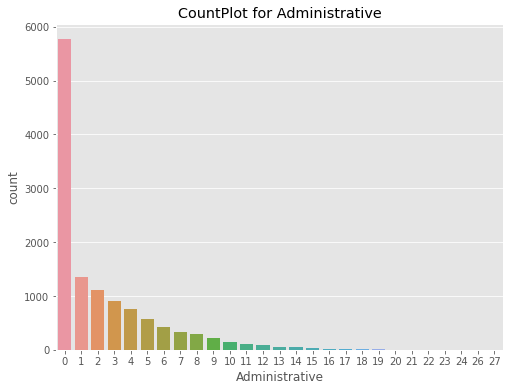

Number in each Category:
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64
──────────
Percentage of each category:
0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
24     0.032441
22     0.032441
23     0.024331
20     0.016221
21     0.016221
26     0.008110
27     0.008110
Name: Administrative, dtype: float64


In [ ]:
count_barplot(df,"Administrative")

Almost **half** of the visitors do not visit any administrative site with the mean administrative site being **2.3** 

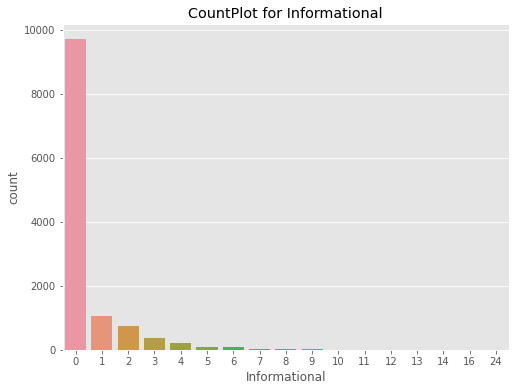

Number in each Category:
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64
──────────
Percentage of each category:
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
11     0.008110
13     0.008110
24     0.008110
16     0.008110
Name: Informational, dtype: float64


In [ ]:
count_barplot(df,"Informational")

**80%** of the users do not visit any informational site.

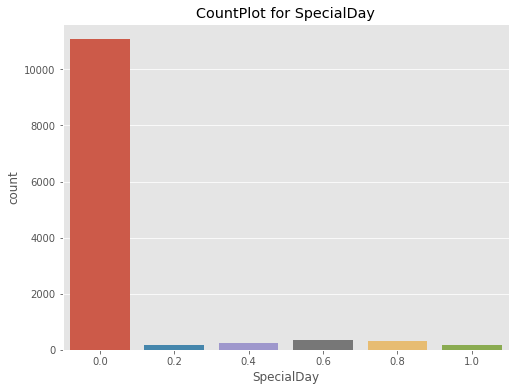

Number in each Category:
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64
──────────
Percentage of each category:
0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
1.0     1.248986
Name: SpecialDay, dtype: float64


In [ ]:
count_barplot(df,"SpecialDay")

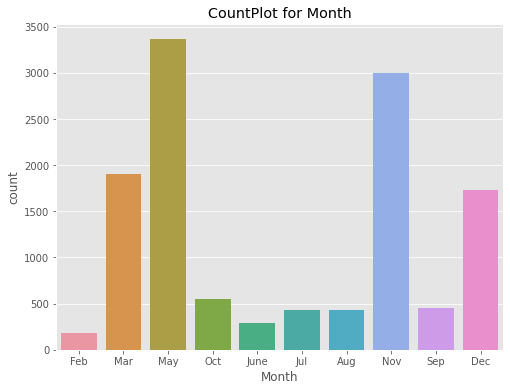

Number in each Category:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
──────────
Percentage of each category:
May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: Month, dtype: float64


In [ ]:
count_barplot(df,"Month")

The site was most visited in the month of **May** followed by the month of **November** with 3364 and 2998 visitors respectively.

In [ ]:
#Pi plot for Categorical Variables
def count_pieplot(df,col):
  fig = px.pie(df,values=df[col].value_counts(),names=df[col].unique(),title=f"Count plot for {col}")
  fig.show()
  print("Number in each Category:")
  print(df[col].value_counts())
  print(u'\u2500' * 10)
  print("Percentage of each category:")
  print(df[col].value_counts(normalize=True)*100)

In [ ]:
count_pieplot(df,"OperatingSystems")

Number in each Category:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
──────────
Percentage of each category:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


Around **95%** of the users are using operating systems **1,2 and 4**. This could be due to prevelance of only few operating systems in the market and does not affect our analysis.
This also means that promotions can be designed specific to these OS as they make up the majority of the visitors.

In [ ]:
count_pieplot(df,"Browser")

Number in each Category:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
──────────
Percentage of each category:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


**88%** of the users used either browsers **1,2 or 4** with **2** being the favourite of the all.

In [ ]:
count_pieplot(df,"Region")

Number in each Category:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
──────────
Percentage of each category:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


**77%** of the users were from **regions 1,2,3 and 4**. Startagies and promotional events should be developed targeting other regions to increase site activity.

### **Continous Variables**

In [ ]:
#Function to plot histogram for continous variables
def hist_plot(df,col,bins):
  plt.figure(figsize=(8,6))
  plt.title(f"Histogram for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  sns.histplot(df[col], bins = bins)
  plt.show()

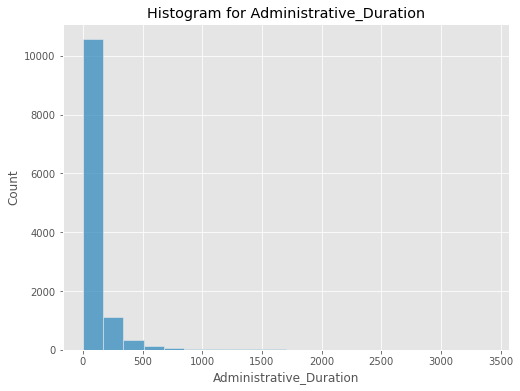

In [ ]:
hist_plot(df,"Administrative_Duration",20)

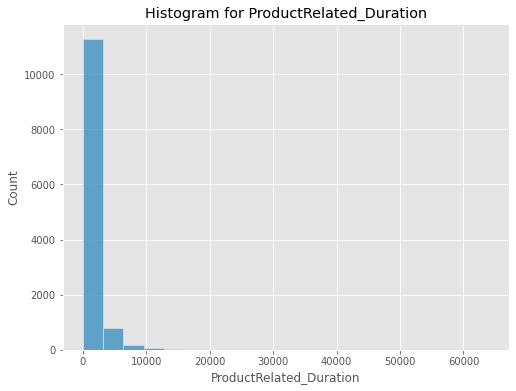

In [ ]:
hist_plot(df,"ProductRelated_Duration",20)

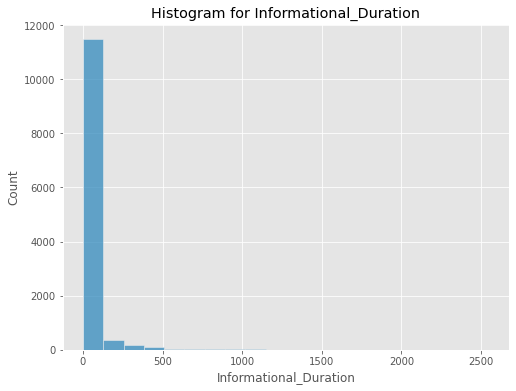

In [ ]:
hist_plot(df,"Informational_Duration",20)

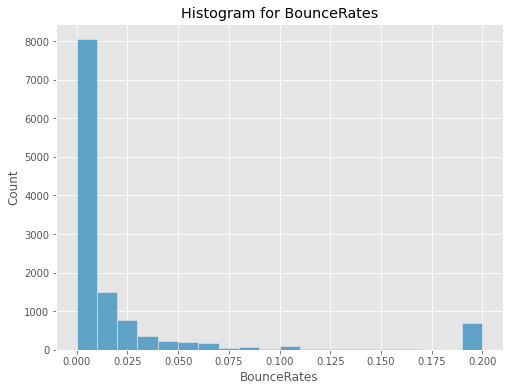

In [ ]:
hist_plot(df,"BounceRates",20)

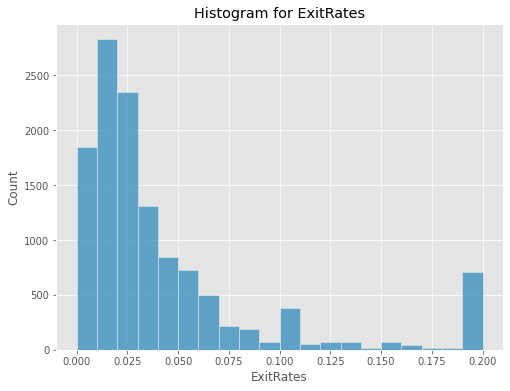

In [ ]:
hist_plot(df,"ExitRates",20)

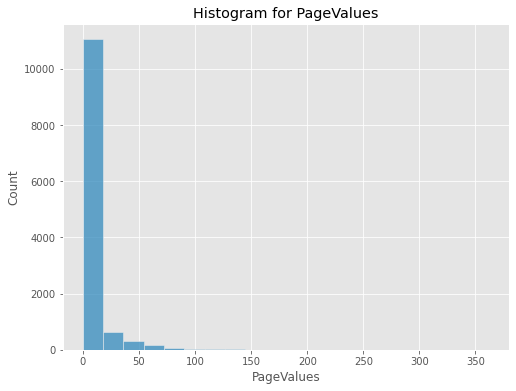

In [ ]:
hist_plot(df,"PageValues",20)

In [ ]:
#Box Whisker plot for continous variables
def bwplot(df,col):
  print(f"Mean of {col}: {df[col].mean()}")
  print(f"Variance of {col}: {df[col].var()}")
  print(f"Skew of {col}: {df[col].skew()}")
  print(f"Min of {col}: {df[col].min()}")
  print(f"Max of {col}: {df[col].max()}")
  print(f"Median of {col}: {df[col].median()}")
  print(f"25th percentile of {col}: {df[col].quantile(0.25)}")
  print(f"75th percentile of {col}: {df[col].quantile(0.75)}")
  print(f"Inter-quartile range of {col}: {df[col].quantile(0.75)-df[col].quantile(0.25)}")

#plotting box and whisker plot for the variables
  sns.boxplot(x=df[col])
  plt.title(f"Box and Whisker Plot for {col}")
  plt.show()

Mean of PageValues: 5.889257862693596
Variance of PageValues: 344.7868380581556
Skew of PageValues: 6.382964248998132
Min of PageValues: 0.0
Max of PageValues: 361.76374189999996
Median of PageValues: 0.0
25th percentile of PageValues: 0.0
75th percentile of PageValues: 0.0
Inter-quartile range of PageValues: 0.0


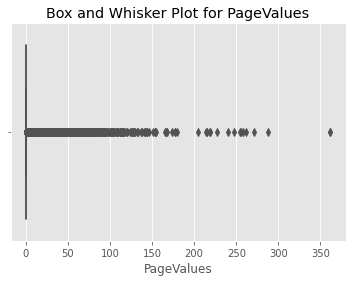

In [ ]:
bwplot(df,"PageValues")

Mean of BounceRates: 0.02219138047072152
Variance of BounceRates: 0.0023511173515877335
Skew of BounceRates: 2.9478552666955347
Min of BounceRates: 0.0
Max of BounceRates: 0.2
Median of BounceRates: 0.0031124675
25th percentile of BounceRates: 0.0
75th percentile of BounceRates: 0.016812558499999998
Inter-quartile range of BounceRates: 0.016812558499999998


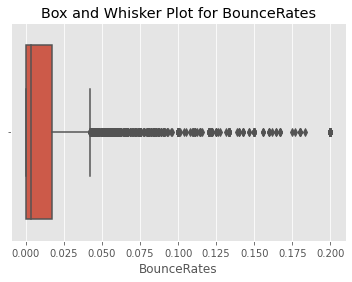

In [ ]:
bwplot(df,"BounceRates")

Mean of ExitRates: 0.04307279776650371
Variance of ExitRates: 0.002361623753568149
Skew of ExitRates: 2.1487889999009804
Min of ExitRates: 0.0
Max of ExitRates: 0.2
Median of ExitRates: 0.0251564025
25th percentile of ExitRates: 0.014285714
75th percentile of ExitRates: 0.05
Inter-quartile range of ExitRates: 0.035714286000000005


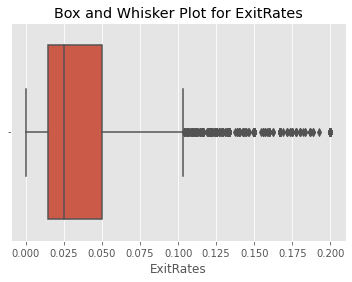

In [ ]:
bwplot(df,"ExitRates")

Mean of Administrative_Duration: 80.81861053933578
Variance of Administrative_Duration: 31250.852838060357
Skew of Administrative_Duration: 5.61571901877419
Min of Administrative_Duration: 0.0
Max of Administrative_Duration: 3398.75
Median of Administrative_Duration: 7.5
25th percentile of Administrative_Duration: 0.0
75th percentile of Administrative_Duration: 93.25625
Inter-quartile range of Administrative_Duration: 93.25625


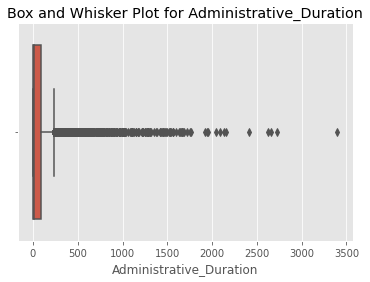

In [ ]:
bwplot(df,"Administrative_Duration")

Mean of Informational_Duration: 34.47239792772309
Variance of Informational_Duration: 19810.363880344565
Skew of Informational_Duration: 7.579184715734214
Min of Informational_Duration: 0.0
Max of Informational_Duration: 2549.375
Median of Informational_Duration: 0.0
25th percentile of Informational_Duration: 0.0
75th percentile of Informational_Duration: 0.0
Inter-quartile range of Informational_Duration: 0.0


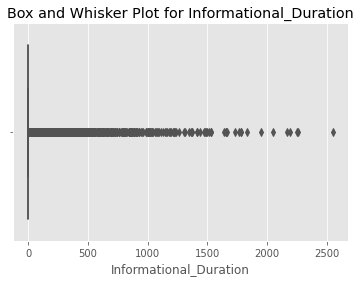

In [ ]:
bwplot(df,"Informational_Duration")

Mean of ProductRelated_Duration: 1194.7462199688305
Variance of ProductRelated_Duration: 3662130.143344506
Skew of ProductRelated_Duration: 7.263227682561322
Min of ProductRelated_Duration: 0.0
Max of ProductRelated_Duration: 63973.522229999995
Median of ProductRelated_Duration: 598.9369047499999
25th percentile of ProductRelated_Duration: 184.1375
75th percentile of ProductRelated_Duration: 1464.1572135
Inter-quartile range of ProductRelated_Duration: 1280.0197134999999


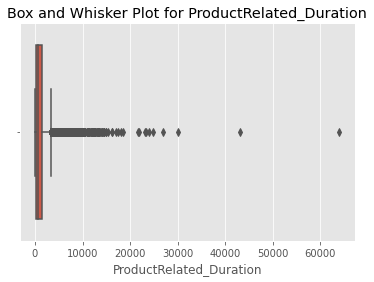

In [ ]:
bwplot(df,"ProductRelated_Duration")

From these box plots we can infer that there are many outliers in the dataset and so they are important for good analysis and hence it is not feasible to remove them.

### **Bivariate Analysis**

In [ ]:
#Function to plot count and percentage plot for categorical variables with target class label as hue
def stacked_bar(df,col):
  ct = pd.crosstab(df[col],df["Revenue"])
  ct.plot(kind="bar",stacked=True)
  plt.title(f"{col} vs Revenue (Count)")
  ct = ct.apply(lambda r: r/r.sum()*100, axis=1)
  ct.plot(kind="bar",stacked=True)
  plt.title(f"{col} vs Revenue (Percentage)")

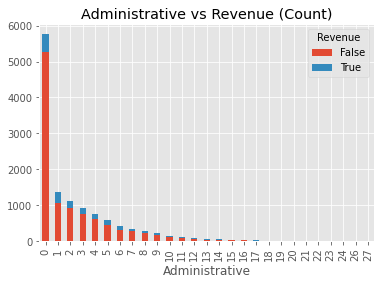

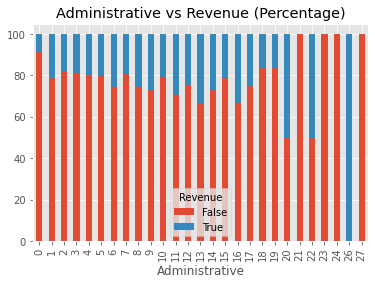

In [ ]:
stacked_bar(df,"Administrative")

From these plots we can infer-



*   The percentage of people who purchased/generated revenue is almost constant at **20%** for all number of pages.
*   For number of pages visited = 26, we have 100% purchase rate but this has very less significance as the number of people visiting is also very low and hence we derive no conclusion from this.



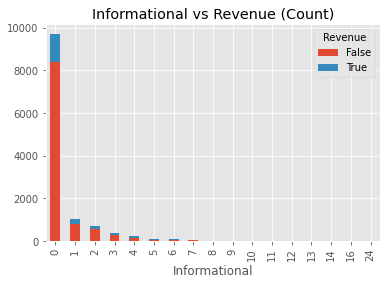

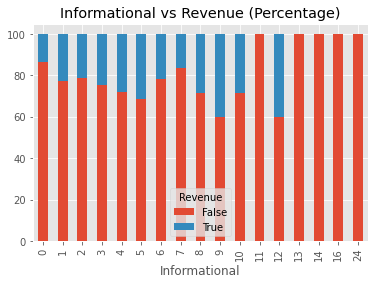

In [ ]:
stacked_bar(df,"Informational")

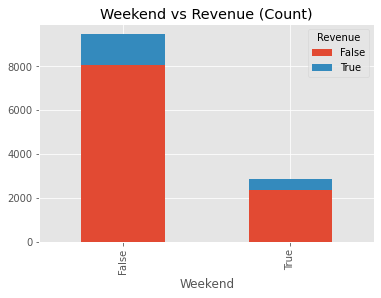

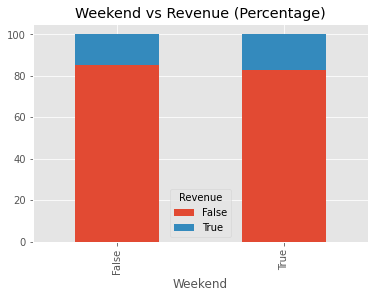

In [ ]:
stacked_bar(df,"Weekend")

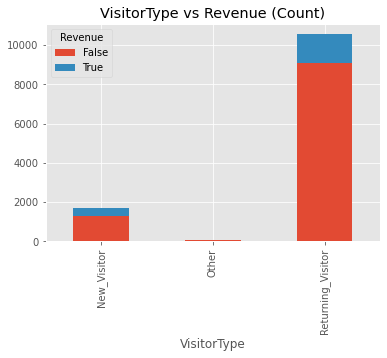

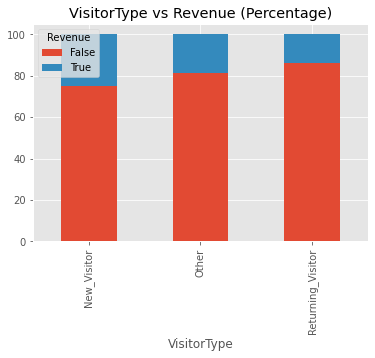

In [ ]:
stacked_bar(df,"VisitorType")

From these plots we infer that - 


*   Majority of the users are **returing users**.
*   The new users made a slightly **higher % of purchase** than the returing users.

These points imply that new users find the products good and the site also has a high retention rate. The area of improvement is to attract new users which can be done through advertisments, targeted promotional events and campaigns.



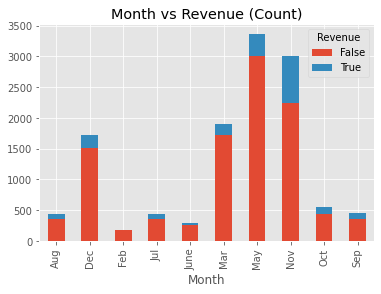

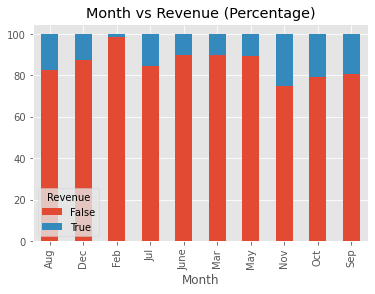

In [ ]:
stacked_bar(df,"Month")

The highest percentage of purchase was made in **November** and the site saw the most number of visitors in **May**.

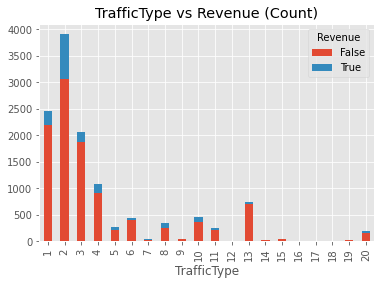

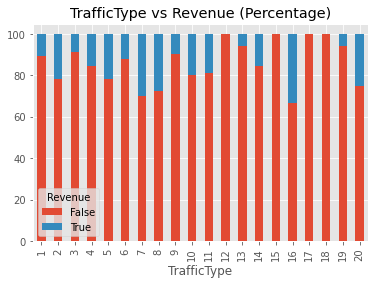

In [ ]:
stacked_bar(df,"TrafficType")

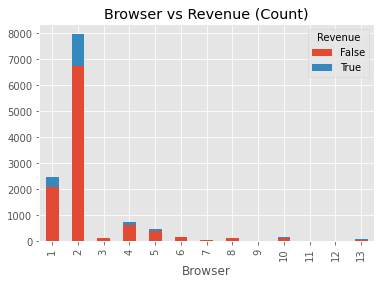

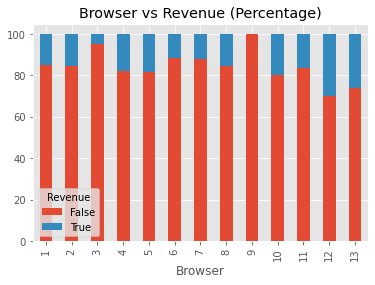

In [ ]:
stacked_bar(df,"Browser")

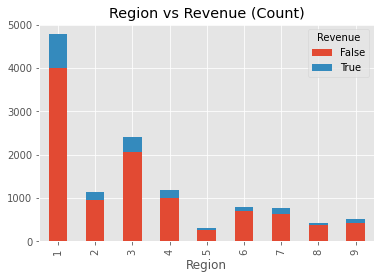

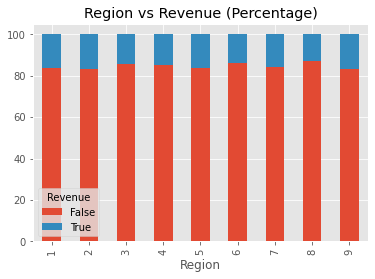

In [ ]:
stacked_bar(df,"Region")

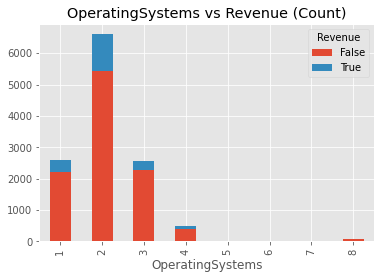

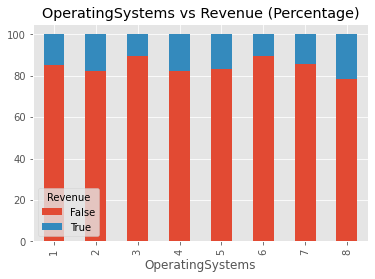

In [ ]:
stacked_bar(df,"OperatingSystems")

In [ ]:
#Replacing True/False with 1/0 in the Target Variable:
df["Revenue"] = df["Revenue"].replace({True: 1, False: 0})

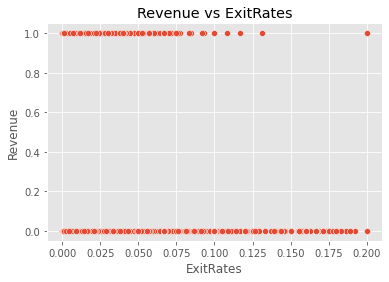

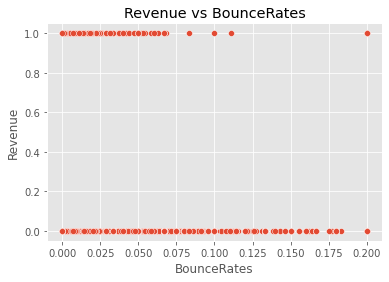

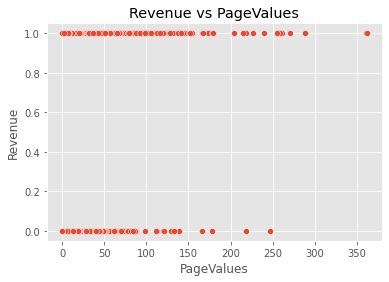

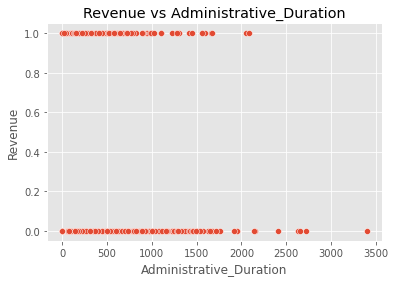

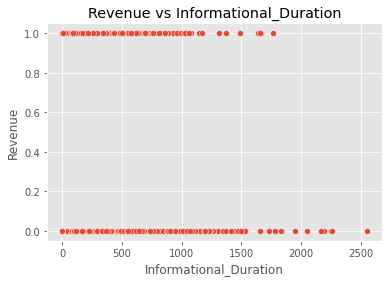

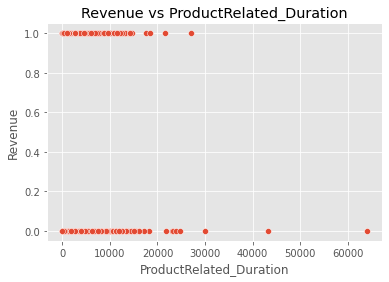

In [ ]:
#Scatter Plot for continous variables wrt Revenue
cont_cols = ["ExitRates","BounceRates","PageValues","Administrative_Duration",
             "Informational_Duration","ProductRelated_Duration"]
for col in cont_cols:
  sns.scatterplot(x = col,y="Revenue",data = df)
  plt.title(f"Revenue vs {col}")
  plt.show()

We can draw the following inferences from the scatter plots:



*   If exit rates is greater than **0.1**, it results in no purchase in most of the cases. This is similar with the case of Bounce Rates also.
*   As the Page Value inreases, so does the probability of purchase being made increases.
*   Very high duration on sites make the purchase unfavourable.







### **Multivariate Analysis**

In [ ]:
#Scatter Plot for multiple variables
def scatter_plot(df,col1,col2):
  sns.scatterplot(x = col1,y=col2,hue="Revenue",data = df)
  plt.title(f"{col2} vs {col1}")

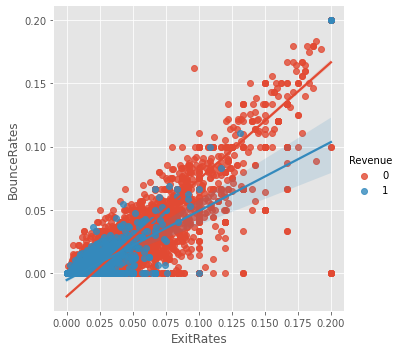

In [ ]:
#LinePlot for Bounce Rates and Exit Rates
sns.lmplot(x = "ExitRates",y="BounceRates",hue="Revenue",data = df)

From this plot we can say that Bounce Rate and Exit Rates are positively correlated.
As the bounce rate increases, the exit rates also increases.

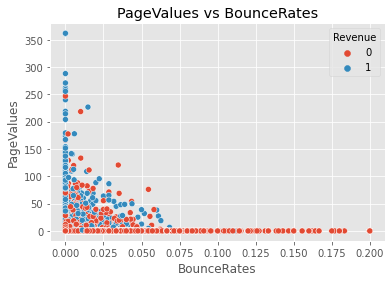

In [ ]:
scatter_plot(df,"BounceRates","PageValues")

We find that a successful purchase was possible with a **high page value** and a **low bounce rate**.

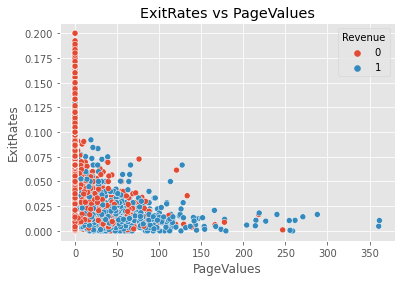

In [ ]:
scatter_plot(df,"PageValues","ExitRates")

We find that a successful purchase was possible with a **high page value** and a **low exit rate**.

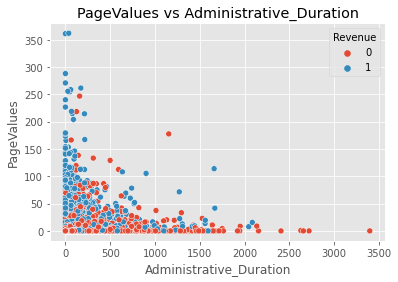

In [ ]:
scatter_plot(df,"Administrative_Duration","PageValues")

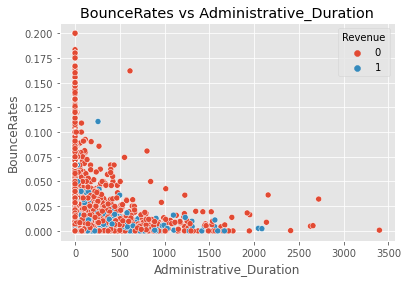

In [ ]:
scatter_plot(df,"Administrative_Duration","BounceRates")

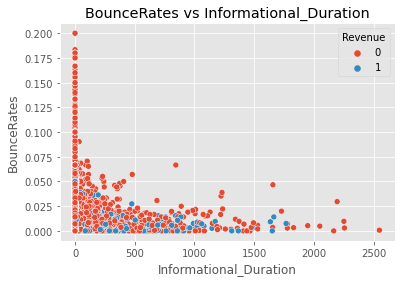

In [ ]:
scatter_plot(df,"Informational_Duration","BounceRates")

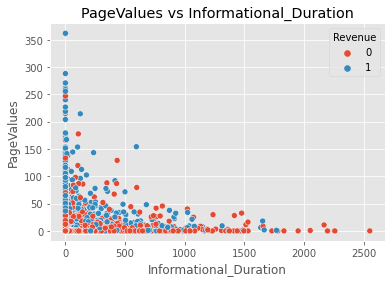

In [ ]:
scatter_plot(df,"Informational_Duration","PageValues")

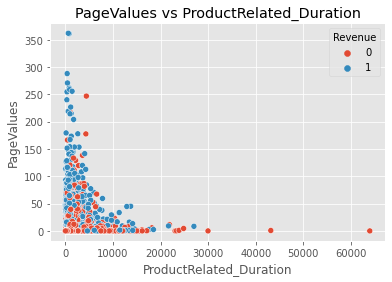

In [ ]:
scatter_plot(df,"ProductRelated_Duration","PageValues")

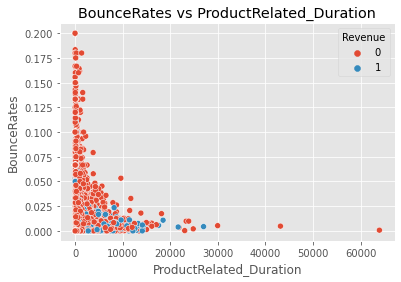

In [ ]:
scatter_plot(df,"ProductRelated_Duration","BounceRates")

From the following plots we infered that the purchase is successful or revenue is True when - 

*   Bounce Rate is **low**
*   Exit Rate is **low**
*   Page Value is **high**
*   ProductRelated_Duration is **low**
*   Administrative_Duration is **low**
*   Informational_Duration is **not very high**







## **Hypothesis Tests/Statistical Tests**

Null Hypothesis : Revenue does not depend on Weekend

Alternate Hypothesis : Revenue does depend on Weekend

In [ ]:
t, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Weekend'], df['Revenue']))
# Confidence Level 95 % 
alpha = 0.05
print('p-value is - %s' %p) 
if p > alpha: 
    print('Null Hypothesis is accepted. Revenue does not depend on Weekend')    
else: 
    print('Null Hypothesis is rejected. Revenue depends on Weekend') 

p-value is - 0.0012663251061221968
Null Hypothesis is rejected. Revenue depends on Weekend


Null Hypothesis : Revenue does not depend on Visitor Type

Alternate Hypothesis : Revenue does depend on Visitor Type

In [ ]:
t, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['VisitorType'], df['Revenue']))
# Confidence Level 95 % 
alpha = 0.05
print('p-value is - %s' %p) 
if p > alpha: 
    print('Null Hypothesis is accepted. Revenue does not depend on Visitor Type')    
else: 
    print('Null Hypothesis is rejected. Revenue depends on Visitor Type') 

p-value is - 4.269904152293867e-30
Null Hypothesis is rejected. Revenue depends on Visitor Type


Null Hypothesis : Revenue does not depend on Traffic Type

Alternate Hypothesis : Revenue does depend on Traffic Type

In [ ]:
t, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['TrafficType'], df['Revenue']))
# Confidence Level 95 % 
alpha = 0.05
print('p-value is - %s' %p) 
if p > alpha: 
    print('Null Hypothesis is accepted. Revenue does not depend on Traffic Type')    
else: 
    print('Null Hypothesis is rejected. Revenue depends on Traffic Type') 

p-value is - 1.652735258160153e-67
Null Hypothesis is rejected. Revenue depends on Traffic Type


Null Hypothesis : Revenue does not depend on Region

Alternate Hypothesis : Revenue does depend on Region

In [ ]:
t, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Region'], df['Revenue']))
# Confidence Level 95 % 
alpha = 0.05
print('p-value is - %s' %p) 
if p > alpha: 
    print('Null Hypothesis is accepted. Revenue does not depend on Region')    
else: 
    print('Null Hypothesis is rejected. Revenue depends on Region') 

p-value is - 0.3214249979076556
Null Hypothesis is accepted. Revenue does not depend on Region


Null Hypothesis : Revenue does not depend on Special Day

Alternate Hypothesis : Revenue does depend on Special Day

In [ ]:
t, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['SpecialDay'], df['Revenue']))
# Confidence Level 95 % 
alpha = 0.05
print('p-value is - %s' %p) 
if p > alpha: 
    print('Null Hypothesis is accepted. Revenue does not depend on Special Day')    
else: 
    print('Null Hypothesis is rejected. Revenue depends on Special Day') 

p-value is - 3.5432443403841987e-19
Null Hypothesis is rejected. Revenue depends on Special Day


Correlation Plot

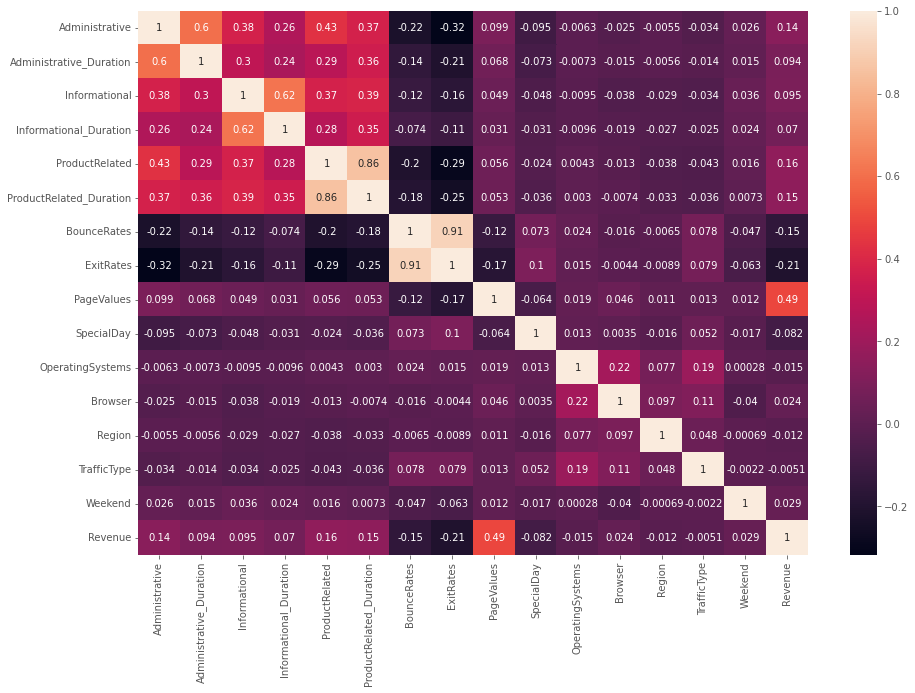

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))        
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

## **PCA**

One Hot Encoding

In [ ]:
df_ohe = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Weekend', 'Revenue'])
df_ohe.shape

(12330, 31)

In [ ]:
df_ohe

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_0,Revenue_1
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0


Number of features increase to 29 and Revenue column containing boolean values is split into 2: Revenue_0 & Revenue_1 converting data type to int.


In [ ]:
x = df_ohe.iloc[:, 0:29].values
y = df_ohe.iloc[:, 30:31].values

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
pca = PCA()
x_1 = pca.fit_transform(x)

Principal Components Weights represent the coefficients of the eigenvectors of the features while performing PCA



In [ ]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.372360,0.317267,0.334498,0.282815,0.402153,0.401646,-0.276828,-0.323730,0.094203,-0.098241,-0.018142,-0.024470,-0.020807,-0.050930,0.025325,-0.003234,-0.063777,0.006420,-0.011917,-0.045492,-0.097749,0.117615,0.040606,0.031906,0.016718,-0.032858,-0.008642,-0.060804,0.060804
1,0.011798,0.026164,0.133258,0.130481,0.172757,0.181017,0.250219,0.262474,-0.141922,0.174952,-0.043010,-0.067638,-0.071599,-0.005506,-0.019198,-0.125935,0.067128,0.006278,0.030567,-0.029948,0.169248,-0.006813,-0.076128,-0.067344,-0.528548,-0.118389,0.545718,0.166034,-0.166034
2,0.050108,0.051938,0.000584,0.003241,0.026412,0.034505,-0.037125,-0.039781,0.065624,-0.032379,0.149769,0.190241,0.079858,0.092807,0.012552,0.125308,-0.014552,-0.008851,0.025284,-0.075024,-0.021175,-0.038136,0.001324,0.034305,0.084893,0.220664,-0.135135,0.636908,-0.636908
3,0.010854,0.027705,0.072446,0.078494,0.066516,0.078442,0.170301,0.157576,0.035133,0.037694,0.450350,0.376695,0.181295,0.348643,-0.039548,0.145679,-0.045551,-0.010915,-0.001346,-0.141551,0.020481,0.060704,-0.048732,-0.050638,-0.125603,0.489115,0.007881,-0.237034,0.237034
4,0.042683,0.035561,-0.009303,-0.014846,-0.000113,-0.011087,-0.200737,-0.194532,0.063661,0.542468,0.014322,0.032930,0.013255,0.072801,-0.047559,-0.131351,0.007130,-0.076974,-0.089277,-0.228929,0.651477,-0.283877,-0.007873,-0.015417,0.104340,-0.029158,-0.095360,-0.024977,0.024977


Scree Plot representing the amount of variance explained by variable number of PCA

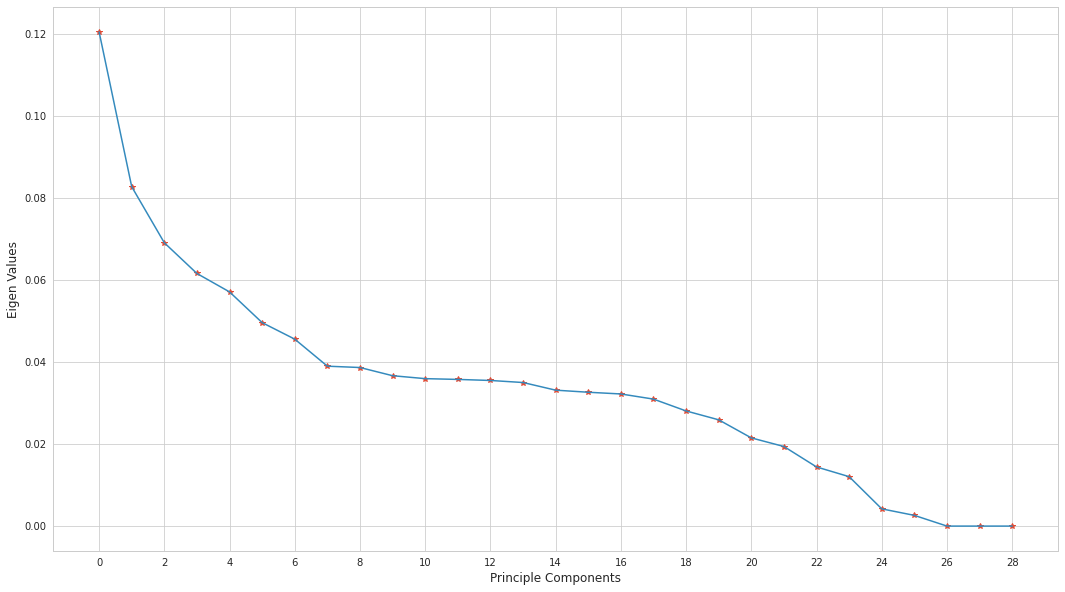

In [ ]:
sns.set_style(style='whitegrid', rc=None)

plt.figure(figsize=(18 , 10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,30,2))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

Proportion of variance plot

Graph explains Eigen values wrt to number of Principle Components


In [ ]:
Xc=x.astype(float)
cov_matrix = np.cov(x_1.T)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

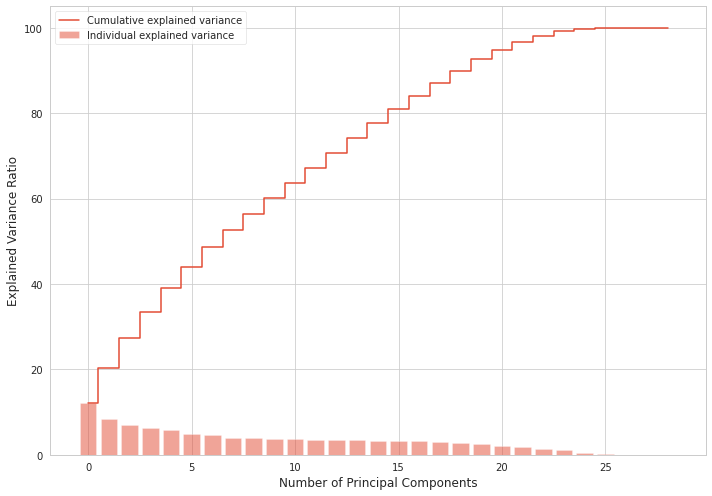

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(29), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(29), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

We can see that the first 18 PC’s explain over 90% variance of the data

A heatplot map to visualize the Principal Components Weights

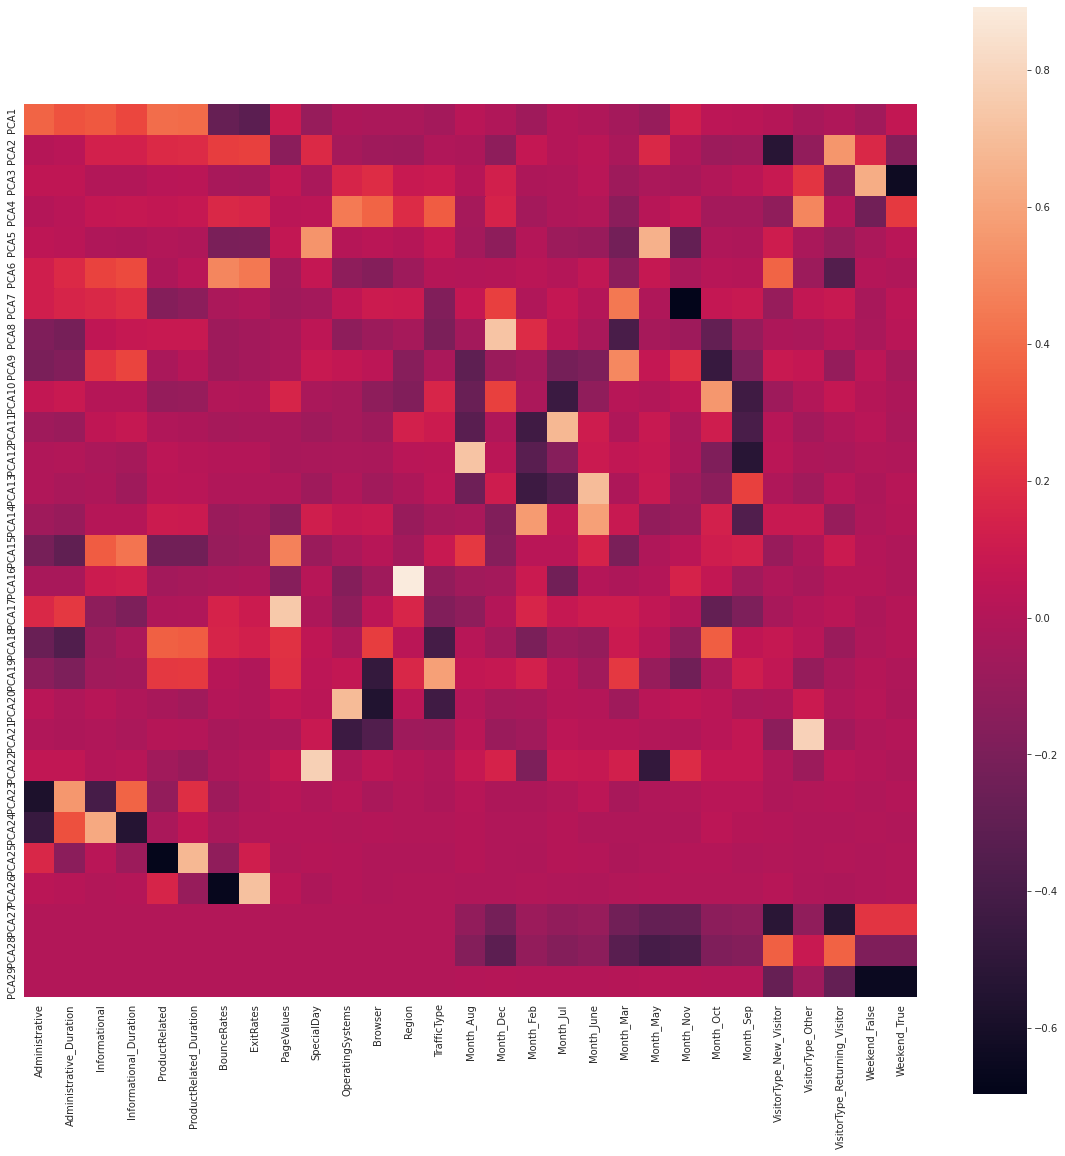

In [ ]:
x_col = list(df_ohe.columns)
x_col.pop()
x_col.pop()
plt.figure(figsize=(20,20))
ax = sns.heatmap(pca.components_, yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)], xticklabels=x_col)
ax.set_aspect("equal")

2D Visualization of PCA components (PCA1 v/s PCA2)

In [ ]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(x)

principalDf = pd.DataFrame(data = X_pca2, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Revenue']]], axis = 1)

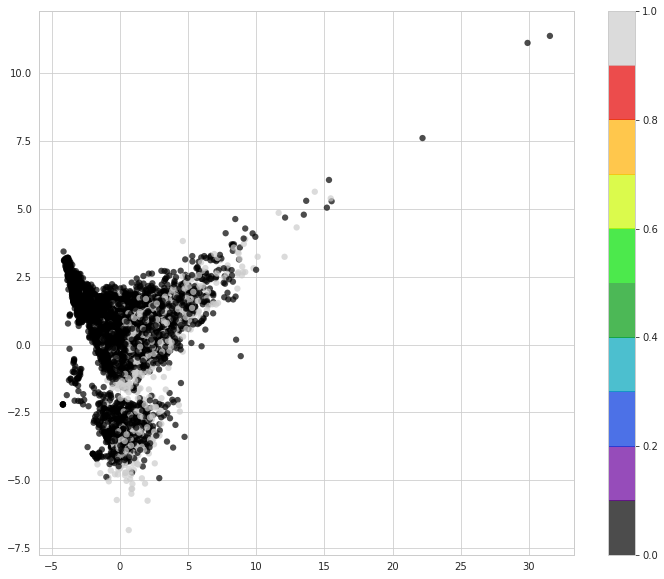

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=df['Revenue'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

Feature reduction using PCA1.

Important features extracted using a biplot and  magnitude of their coefficients

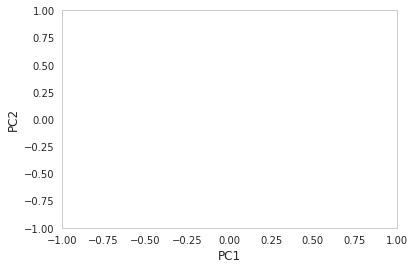

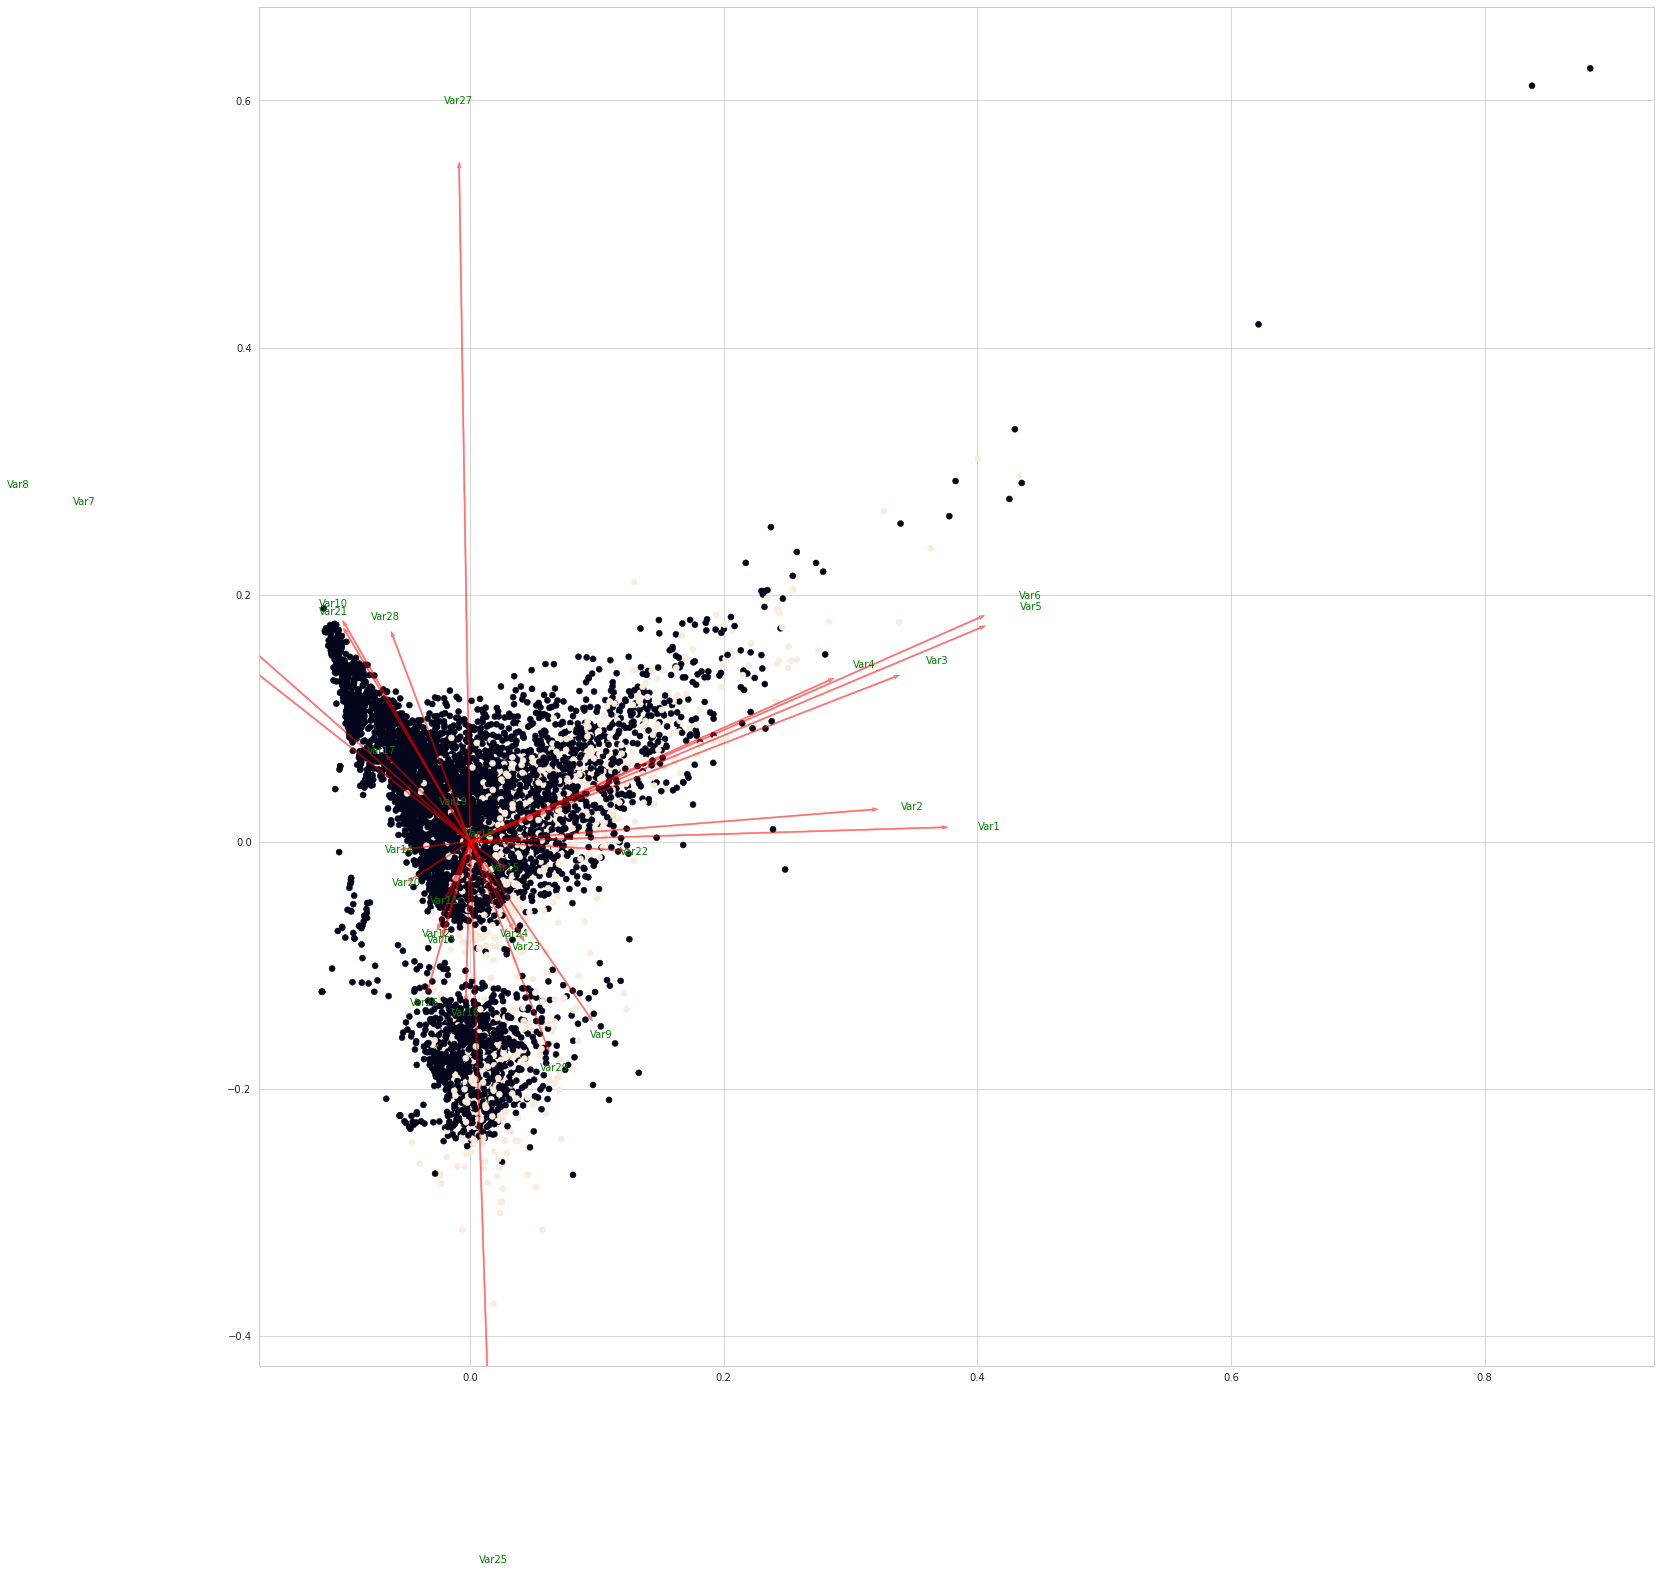

In [ ]:
X = df_ohe.iloc[:, 0:29].values
y = df_ohe.iloc[:, 30:31].values
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA(n_components=2)
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(25,25))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

Most important 14 features according to PCA1
1. Var 1 - 'Administrative'
2. Var 2 - 'Administrative_Duration'
3. Var 3 - 'Informational'
4. Var 4 - 'Informational_Duration'
5. Var 5 - 'ProductRelated'
6. Var 6 - 'ProductRelated_Duration'
7. Var 9 - 'PageValues'
8. Var 15 - 'Month_Aug'
9. Var 18 - 'Month_Jul'
10. Var 22 - 'Month_Nov'
11. Var 23 - 'Month_Oct'
12. Var 24 - 'Month_Sep'
13. Var 25 - 'VisitorType_New_Visitor'
14. Var 29 - 'Weekend_True'





Variance explained by PCA1 and PCA2 respectively

In [ ]:
print(pca.explained_variance_ratio_)

[0.12050782 0.08275721]


Importance of a feature is in direct relationship with the absolute(mod) of the corresponding values in the eigenvectors

In [ ]:
print(abs( pca.components_ ))

[[0.37236304 0.3172693  0.33449624 0.28281328 0.40215156 0.40164432
  0.2768284  0.32373056 0.09419795 0.09824204 0.01813923 0.02446465
  0.02081116 0.05092847 0.02532451 0.00324614 0.06377895 0.00641675
  0.01190509 0.04549091 0.09774994 0.11761388 0.0406193  0.03191286
  0.01671721 0.0328559  0.00864162 0.06080394 0.06080394]
 [0.01159665 0.02600536 0.13319564 0.13045506 0.17305827 0.18136839
  0.25040819 0.26263582 0.14168155 0.17509541 0.04331427 0.06746299
  0.07179378 0.00586326 0.01919606 0.1252608  0.06723523 0.00612518
  0.02975347 0.02983093 0.16928401 0.00691305 0.07688105 0.06711356
  0.5284164  0.11843215 0.54559937 0.16600518 0.16600518]]


Number of appropriate dimensions using PCA such that the RMSE < 1% of the standard deviation

In [ ]:
rmseArr=[]
epoch=[]
for i in range(0, 30):
  pca = PCA(n_components=i)
  x1 = pca.fit_transform(x)
  x2 = pca.inverse_transform(x1)
  rmseArr.append(mean_squared_error(x, x2, squared=False)/np.sqrt(np.square(x).sum(axis=1)).mean())
  if mean_squared_error(x, x2, squared=False)/np.sqrt(np.square(x).sum(axis=1)).std()*100<1:
    print('Value for which the ratio is less than 1 is: ' + str(i))
  epoch.append(i)

10.263250329886853
Value for which the ratio is less than 1 is: 25
Value for which the ratio is less than 1 is: 26
Value for which the ratio is less than 1 is: 27
Value for which the ratio is less than 1 is: 28
Value for which the ratio is less than 1 is: 29


Plot between different number of components of PCA v/s RMSE

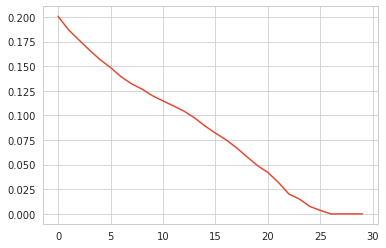

In [ ]:
plt.plot(epoch, rmseArr)

## **Machine Learning Models**

### **Data Preprocessing/Feature Engineering (Imbalanced Dataset)**

In [ ]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#### **Including all variables**

In [ ]:
#Creating dummy variables
categorical_column = ['Month','VisitorType']
dummy_columns = pd.get_dummies(df[categorical_column])
df = df.drop(categorical_column, axis = 1)
df = pd.concat([df, dummy_columns] , axis=1)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = df['Revenue']
X = df.drop(columns = ["Revenue"], inplace = False, axis = 1)

In [ ]:
#Standardising the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Going to Use a 80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### **Including only important variables**

In [ ]:
#Including only Important variables (PCA)
cols = [6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 25, 26, 27, 29, 30]
df_pca = df_ohe.drop(df_ohe.columns[cols], axis=1)
X_pca = df_pca

In [ ]:
#Standardising the data
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)

In [ ]:
#Going to Use a 80-20 Train-Test Split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 1)

### **Logistic Regression**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Logistic Regression
lm = LogisticRegression(max_iter = 2000, solver = 'saga')

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10, 100]        #C: Inverse of regularization strength

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(lm, search_space, n_jobs= -1, cv = cross_val, scoring = 'f1')
search_result = search.fit(X_train, y_train)
c = search_result.best_params_['C']

In [ ]:
print(c) #HP (LR - ALL VARIABLES)

5


In [ ]:
#Logistic Regression Model with tuned hyperparameters
model1 = LogisticRegression(max_iter = 2000, solver='saga', C = c)
model1.fit(X_train, y_train)
y_test_pred1 = model1.predict(X_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred1)
precision = precision_score(y_test, y_test_pred1)
recall = recall_score(y_test, y_test_pred1)
f1 = f1_score(y_test, y_test_pred1)
conf_matrix1 = confusion_matrix(y_test, y_test_pred1)
p1 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix1))

Accuracy = 0.892133
F1 Score = 0.511029
Precision = 0.720207
Recall = 0.396011
      0    1
0  2061   54
1   212  139


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Logistic Regression
lm = LogisticRegression(max_iter = 2000, solver = 'saga')

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10, 100]          #C: Inverse of regularization strength

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(lm, search_space, n_jobs= -1, cv = cross_val, scoring = 'f1')
search_result = search.fit(X_pca_train, y_pca_train)
c = search_result.best_params_['C']

In [ ]:
print(c) #HP (LR - IMP. VARIABLES)

1


In [ ]:
#Logistic Regression Model with tuned hyperparameters
modelp1 = LogisticRegression(max_iter = 2000, solver='saga', C = c)
modelp1.fit(X_pca_train, y_pca_train)
y_pca_test_pred1 = modelp1.predict(X_pca_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred1)
precision = precision_score(y_pca_test, y_pca_test_pred1)
recall = recall_score(y_pca_test, y_pca_test_pred1)
f1 = f1_score(y_pca_test, y_pca_test_pred1)
conf_matrixp1 = confusion_matrix(y_pca_test, y_pca_test_pred1)
pc1 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp1))

Accuracy = 0.888078
F1 Score = 0.490775
Precision = 0.696335
Recall = 0.378917
      0    1
0  2057   58
1   218  133


### **Support Vector Classifier**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Support Vector Classifier
svc = LinearSVC(max_iter = 5000)

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10]            #C: Regularization parameter

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(svc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')

#Kernelising X_train
featuremap = Nystroem(gamma = 0.2, n_components = 70, random_state = 1)
X_kernelised = featuremap.fit_transform(X_train)
result = search.fit(X_train, y_train)
c = result.best_params_['C']

In [ ]:
print(c)   #HP (SVC - ALL VARIABLES)

10


In [ ]:
#Kernelising X_test
X_test_kernelised = featuremap.fit_transform(X_test)

#Support Vector Classifier with tuned hyperparameters
model2 = LinearSVC(dual = False, C = c, max_iter = 5000)
model2.fit(X_kernelised, y_train)
y_test_pred2 = model2.predict(X_test_kernelised)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred2)
precision = precision_score(y_test, y_test_pred2)
recall = recall_score(y_test, y_test_pred2)
f1 = f1_score(y_test, y_test_pred2)
conf_matrix2 = confusion_matrix(y_test, y_test_pred2)
p2 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix2))

Accuracy = 0.832928
F1 Score = 0.009615
Precision = 0.030769
Recall = 0.005698
      0   1
0  2052  63
1   349   2


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Support Vector Classifier
svc = LinearSVC(max_iter = 5000)

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10]                      #C: Regularization parameter

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(svc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')

#Kernelising X_pca_train
featuremap = Nystroem(gamma = 0.2, n_components = 70, random_state = 1)
X_pca_kernelised = featuremap.fit_transform(X_pca_train)
result = search.fit(X_pca_train, y_pca_train)
c = result.best_params_['C']

In [ ]:
print(c)   #HP (SVC - IMP. VARIABLES)

10


In [ ]:
#Kernelising X_pca_test
X_pca_test_kernelised = featuremap.fit_transform(X_pca_test)

#Support Vector Classifier with tuned hyperparameters
modelp2 = LinearSVC(dual = False, C = c, max_iter = 5000)
modelp2.fit(X_pca_kernelised, y_pca_train)
y_pca_test_pred2 = modelp2.predict(X_pca_test_kernelised)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred2)
precision = precision_score(y_pca_test, y_pca_test_pred2)
recall = recall_score(y_pca_test, y_pca_test_pred2)
f1 = f1_score(y_pca_test, y_pca_test_pred2)
conf_matrixp2 = confusion_matrix(y_pca_test, y_pca_test_pred2)
pc2 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp2))

Accuracy = 0.407137
F1 Score = 0.074684
Precision = 0.048007
Recall = 0.168091
     0     1
0  945  1170
1  292    59


### **Random Forest Classsifier**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Random Forest Classifier
rfc = RandomForestClassifier()

#Defining Search Space
search_space = {}
search_space['max_depth'] = np.arange(5, 26)                                 # max_depth: The maximum depth of the tree
search_space['n_estimators'] = [50, 100, 75, 125, 150, 175, 200]             # n_estimators: The number of trees in the forest.

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(rfc, search_space, cv = cross_val, n_jobs=-1, scoring='f1')
search_result = search.fit(X_train, y_train)
m = search_result.best_params_['max_depth']
n = search_result.best_params_['n_estimators']

In [ ]:
print(m, n)   #2 HPs (RF - ALL VARIABLES)

23 100


In [ ]:
#Random forest classifier with tuned hyperparameters
model3 = RandomForestClassifier(max_depth = m, n_estimators = n)
model3.fit(X_train, y_train)
y_test_pred3 = model3.predict(X_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred3)
precision = precision_score(y_test, y_test_pred3)
recall = recall_score(y_test, y_test_pred3)
f1 = f1_score(y_test, y_test_pred3)
conf_matrix3 = confusion_matrix(y_test, y_test_pred3)
p3 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix3))

Accuracy = 0.910787
F1 Score = 0.649682
Precision = 0.736462
Recall = 0.581197
      0    1
0  2042   73
1   147  204


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Random Forest Classifier
rfc = RandomForestClassifier()

#Defining Search Space
search_space = {}
search_space['max_depth'] = np.arange(5, 26)
search_space['n_estimators'] = [50, 100, 75, 125, 150, 175, 200]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(rfc, search_space, cv = cross_val, n_jobs=-1, scoring='f1')
search_result = search.fit(X_pca_train, y_pca_train)
m = search_result.best_params_['max_depth']
n = search_result.best_params_['n_estimators']

In [ ]:
print(m, n)   #2 HPs (RF - IMP. VARIABLES)

12 125


In [ ]:
#Random forest classifier with tuned hyperparameters
modelp3 = RandomForestClassifier(max_depth = m, n_estimators = n)
modelp3.fit(X_pca_train, y_pca_train)
y_pca_test_pred3 = modelp3.predict(X_pca_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred3)
precision = precision_score(y_pca_test, y_pca_test_pred3)
recall = recall_score(y_pca_test, y_pca_test_pred3)
f1 = f1_score(y_pca_test, y_pca_test_pred3)
conf_matrixp3 = confusion_matrix(y_pca_test, y_pca_test_pred3)
pc3 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp3))

Accuracy = 0.897810
F1 Score = 0.619335
Precision = 0.659164
Recall = 0.584046
      0    1
0  2009  106
1   146  205


### **Neural Networks**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Neural Network Classifier
nnc = MLPClassifier(max_iter = 5000, solver ='adam')

#Defining Search Space
search_space = {}
search_space['hidden_layer_sizes'] = [(100,), (75,75), (200,)]           
search_space['alpha'] = [0.05, 0.1, 0.5, 1, 5]                           #alpha: L2 penalty (regularization term) parameter

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(nnc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')
search_result = search.fit(X_train, y_train)
a = search_result.best_params_['alpha']
h = search_result.best_params_['hidden_layer_sizes']

In [ ]:
print(a, h)   #2 HPs (NN - ALL VARIABLES)

0.5 (75, 75)


In [ ]:
#Neural Network Classifier Model with tuned hyperparameters
model4 = MLPClassifier(max_iter = 5000, solver='adam', alpha = a, hidden_layer_sizes = h)
model4.fit(X_train, y_train)
y_test_pred4 = model4.predict(X_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred4)
precision = precision_score(y_test, y_test_pred4)
recall = recall_score(y_test, y_test_pred4)
f1 = f1_score(y_test, y_test_pred4)
conf_matrixp4 = confusion_matrix(y_test, y_test_pred4)
p4 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp4))

Accuracy = 0.901460
F1 Score = 0.617323
Precision = 0.690141
Recall = 0.558405
      0    1
0  2027   88
1   155  196


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Neural Network Classifier
nnc = MLPClassifier(max_iter = 5000, solver ='adam')

#Defining Search Space
search_space = {}
search_space['hidden_layer_sizes'] = [(100,), (75, 75), (200,)]
search_space['alpha'] = [0.05, 0.1, 0.5, 1, 5]                              #alpha: L2 penalty (regularization term) parameter

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(nnc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')
search_result = search.fit(X_pca_train, y_pca_train)
a = search_result.best_params_['alpha']
h = search_result.best_params_['hidden_layer_sizes']

In [ ]:
print(a, h)   #2 HPs (NN - IMP. VARIABLES)

0.1 (100,)


In [ ]:
#Neural Network Classifier Model with tuned hyperparameters
modelp4= MLPClassifier(max_iter=1500, solver='adam', alpha=a, hidden_layer_sizes = h)
modelp4.fit(X_pca_train, y_pca_train)
y_pca_test_pred4 = modelp4.predict(X_pca_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred4)
precision = precision_score(y_pca_test, y_pca_test_pred4)
recall = recall_score(y_pca_test, y_pca_test_pred4)
f1 = f1_score(y_pca_test, y_pca_test_pred4)
conf_matrix4 = confusion_matrix(y_pca_test, y_pca_test_pred4)
pc4 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix4))

Accuracy = 0.899432
F1 Score = 0.621951
Precision = 0.668852
Recall = 0.581197
      0    1
0  2014  101
1   147  204


### **Performance**

**Including all variables**

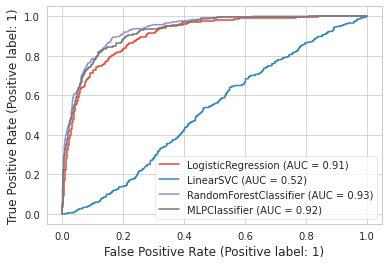

In [ ]:
#ROC (Receiver Operating Characteristic) curves & ROC AUC scores for

#1. Logistic Regression Model
g1 = plot_roc_curve(model1, X_test, y_test)
y_prob_pred1 = model1.predict_proba(X_test)[:,1]
A1 = round(roc_auc_score(y_test, y_prob_pred1), 2)

#2. Support Vector Classifier
g2 = plot_roc_curve(model2, X_test_kernelised, y_test, ax = g1.ax_)
A2 = 0.52

#3. Random Forest Classifier
g3 = plot_roc_curve(model3, X_test, y_test, ax = g1.ax_)
y_prob_pred3 = model3.predict_proba(X_test)[:,1]
A3 = round(roc_auc_score(y_test, y_prob_pred3), 2)

#4. Neural Network Classifier
g4 = plot_roc_curve(model4, X_test, y_test, ax = g1.ax_)
y_prob_pred4 = model4.predict_proba(X_test)[:,1]
A4 = round(roc_auc_score(y_test, y_prob_pred4), 2)

p5 = [A1, A2, A3, A4]

In [ ]:
#Confusion Matrices for 

#1. Logistic Regression Model
print("Confusion matrix: Logistic Regression")
print(pd.DataFrame(conf_matrix1))

#2. Support Vector Classifier
print("Confusion matrix: Support Vector Classifier")
print(pd.DataFrame(conf_matrix2))

#3. Random Forest Classifier
print("Confusion matrix: Random forest Classifier")
print(pd.DataFrame(conf_matrix3))

#4. Neural Network Classifier
print("Confusion matrix: Neural Networks")
print(pd.DataFrame(conf_matrix4))

Confusion matrix: Logistic Regression
      0    1
0  2061   54
1   212  139
Confusion matrix: Support Vector Classifier
      0   1
0  2052  63
1   349   2
Confusion matrix: Random forest Classifier
      0    1
0  2042   73
1   147  204
Confusion matrix: Neural Networks
      0    1
0  2014  101
1   147  204


In [ ]:
#Performance of all four models
performance = pd.DataFrame(list(zip(p1, p2, p3, p4)))
performance.loc[4] = p5
performance.index = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']
performance.columns = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classsifier', 'Neural Networks']
performance

,Logistic Regression,Support Vector Classifier,Random Forest Classsifier,Neural Networks
Accuracy,0.892133,0.832928,0.910787,0.901460
Precision,0.720207,0.030769,0.736462,0.690141
Recall,0.396011,0.005698,0.581197,0.558405
F1 score,0.511029,0.009615,0.649682,0.617323
AUC,0.910000,0.530000,0.930000,0.920000


**Including only important variables**

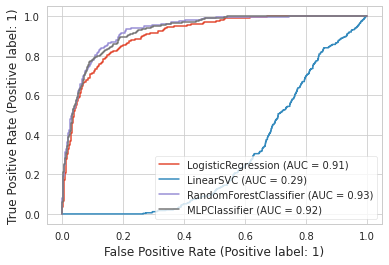

In [ ]:
#ROC (Receiver Operating Characteristic) curves & ROC AUC scores for

#1. Logistic Regression Model
g1 = plot_roc_curve(modelp1, X_pca_test, y_pca_test)
y_pca_prob_pred1 = modelp1.predict_proba(X_pca_test)[:,1]
A1 = round(roc_auc_score(y_pca_test, y_pca_prob_pred1), 2)

#2. Support Vector Classifier
g2 = plot_roc_curve(modelp2, X_pca_test_kernelised, y_pca_test, ax = g1.ax_)
A2 = 0.29

#3. Random Forest Classifier
g3 = plot_roc_curve(modelp3, X_pca_test, y_pca_test, ax = g1.ax_)
y_pca_prob_pred3 = modelp3.predict_proba(X_pca_test)[:,1]
A3 = round(roc_auc_score(y_pca_test, y_pca_prob_pred3), 2)

#4. Neural Network Classifier
g4 = plot_roc_curve(modelp4, X_pca_test, y_pca_test, ax = g1.ax_)
y_pca_prob_pred4 = modelp4.predict_proba(X_pca_test)[:,1]
A4 = round(roc_auc_score(y_pca_test, y_pca_prob_pred4), 2)

pc5 = [A1, A2, A3, A4]

In [ ]:
#Confusion Matrices for 

#1. Logistic Regression Model
print("Confusion matrix: Logistic Regression")
print(pd.DataFrame(conf_matrixp1))

#2. Support Vector Classifier
print("Confusion matrix: Support Vector Classifier")
print(pd.DataFrame(conf_matrixp2))

#3. Random Forest Classifier
print("Confusion matrix: Random forest Classifier")
print(pd.DataFrame(conf_matrixp3))

#4. Neural Network Classifier
print("Confusion matrix: Neural Networks")
print(pd.DataFrame(conf_matrixp4))

Confusion matrix: Logistic Regression
      0    1
0  2057   58
1   218  133
Confusion matrix: Support Vector Classifier
     0     1
0  945  1170
1  292    59
Confusion matrix: Random forest Classifier
      0    1
0  2009  106
1   146  205
Confusion matrix: Neural Networks
      0    1
0  2027   88
1   155  196


In [ ]:
#Performance of all four models
performance = pd.DataFrame(list(zip(pc1, pc2, pc3, pc4)))
performance.loc[4] = pc5
performance.index = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']
performance.columns = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classsifier', 'Neural Networks']
performance

,Logistic Regression,Support Vector Classifier,Random Forest Classsifier,Neural Networks
Accuracy,0.888078,0.407137,0.897810,0.899432
Precision,0.696335,0.048007,0.659164,0.668852
Recall,0.378917,0.168091,0.584046,0.581197
F1 score,0.490775,0.074684,0.619335,0.621951
AUC,0.910000,0.530000,0.930000,0.920000


### **Inferences**

I. When all variables are used:

1. The Random Forest (RF) Classifier has the best Accuracy, Precision, Recall, F1 score, and ROC AUC score when compared to the other three models. Neural networks (NN) classifier is very close to the Random Forest Classifier in all aspects.
2. Logistic Regression (LR) model has good accuracy, precision, and ROC AUC score but its recall and F1 score are much lesser than the RF classifier and the NN classifier.
3. Support vector classifier has good accuracy but its Precision, Recall, F1 score and ROC AUC score are very less.

II. When only important variables are used:

1. The RF classifier and NN classifier have almost same values in all aspects. The NN classifier has better Accuracy, Precision, and F1 score whereas the RF classifier has better Recall and ROC AUC score.
2. The logisitc Regression model has the highest precision among all four models. It's Accuracy, ROC AUC score are also good but Recall and F1 scores are much lesser than the RF classifier and the NN classifier.
3. Support vector classifier has bad Accuracy, Precision, Recall, F1 score and ROC AUC score when compared to the other three models.

III. Effect of dropping all variables other than the important variables: 

1. All aspects in the LR, RF and NN classifiers are close in both cases. Most of them are lesser when only important variables are used but some like Recall (in LR, RF & NN), F1 score (in LR, NN) have slightly higher values when only important variables are used.
2. In SVC, most of the aspects differ largely from each other except for Precision. Accuracy & ROC AUC score decreases but Recall and F1 score increases when only important variables are used.


The Random forest classifier and Neural Network classifier are the best among the four models. If memory and time are concerned then it won't be a bad idea to consider only the important variables for the model since all of the performance metrics are close in both the cases. The RF classifier is best when all variables are used and NN classiifier is slightly ahead of RF classifier when only important variables are used.

### **Data Preprocessing/Feature Engineering (Balanced Dataset)**
The false to true ratio in the target variable (Revenue) is around 4.5. So, we tried to decrease this imbalance to increase the performance of the models.

#### **Including all variables**

In [ ]:
#Separating rows whose Revenue attribute is True and appending them to the original dataframe to decrease the imbalance
df2 = df[df['Revenue'] == 1]
df3 = df.copy()
for i in range(4):
  df3 = df3.append(df2)

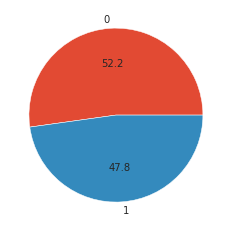

In [ ]:
#Pie chart showing False and True percentages in the Revenue column
plt.pie(df3['Revenue'].value_counts(), labels= df3['Revenue'].value_counts().index, autopct ='%1.1f')
plt.show()

In [ ]:
y2 = df3['Revenue']
X2 = df3.drop(columns = ["Revenue"], inplace = False, axis = 1)

In [ ]:
#Standardising the data
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [ ]:
#Going to Use a 80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2)

#### **Including only important variables**

In [ ]:
#Separating rows whose Revenue attribute is True and appending them to the original dataframe to decrease the imbalance
df_pca['Revenue'] = df['Revenue']
dfp2 = df_pca[df_pca['Revenue'] == 1]
dfp3 = df_pca.copy()
for i in range(4):
  dfp3 = dfp3.append(dfp2)

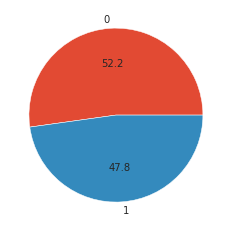

In [ ]:
#Pie chart showing False and True percentages in the Revenue column
plt.pie(dfp3['Revenue'].value_counts(), labels= dfp3['Revenue'].value_counts().index, autopct ='%1.1f')
plt.show()

In [ ]:
y_pca2 = dfp3['Revenue']
X_pca2 = dfp3.drop(columns = ["Revenue"], inplace = False, axis = 1)

In [ ]:
#Standardising the data
scaler = StandardScaler()
X_pca2 = scaler.fit_transform(X_pca2)

In [ ]:
#Going to Use a 80-20 Train-Test Split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca2, y_pca2, test_size = 0.2, random_state = 1)

### **Logistic Regression**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Logistic Regression
lm = LogisticRegression(max_iter = 2000, solver = 'saga')

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10, 100]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(lm, search_space, n_jobs= -1, cv = cross_val, scoring = 'f1')
search_result = search.fit(X_train, y_train)
c = search_result.best_params_['C']

In [ ]:
print(c)      #HP (LR - BALANCED DATASET - ALL VARIABLES)

10


In [ ]:
#Logistic Regression Model with tuned hyperparameters
model1 = LogisticRegression(max_iter = 2000, solver='saga', C = c)
model1.fit(X_train, y_train)
y_test_pred1 = model1.predict(X_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred1)
precision = precision_score(y_test, y_test_pred1)
recall = recall_score(y_test, y_test_pred1)
f1 = f1_score(y_test, y_test_pred1)
conf_matrix1 = confusion_matrix(y_test, y_test_pred1)
p1 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix1))

Accuracy = 0.824443
F1 Score = 0.804681
Precision = 0.863120
Recall = 0.753653
      0     1
0  1848   229
1   472  1444


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Logistic Regression
lm = LogisticRegression(max_iter = 2000, solver = 'saga')

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10, 100]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(lm, search_space, n_jobs= -1, cv = cross_val, scoring = 'f1')
search_result = search.fit(X_pca_train, y_pca_train)
c = search_result.best_params_['C']

In [ ]:
print(c)      #HP (LR - BALANCED DATASET - IMP. VARIABLES)

10


In [ ]:
#Logistic Regression Model with tuned hyperparameters
modelp1 = LogisticRegression(max_iter = 2000, solver='saga', C = c)
modelp1.fit(X_pca_train, y_pca_train)
y_pca_test_pred1 = modelp1.predict(X_pca_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred1)
precision = precision_score(y_pca_test, y_pca_test_pred1)
recall = recall_score(y_pca_test, y_pca_test_pred1)
f1 = f1_score(y_pca_test, y_pca_test_pred1)
conf_matrixp1 = confusion_matrix(y_pca_test, y_pca_test_pred1)
pc1 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp1))

Accuracy = 0.812672
F1 Score = 0.782432
Precision = 0.859974
Recall = 0.717716
      0     1
0  1900   219
1   529  1345


### **Support Vector Classifier**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Support Vector Classifier
svc = LinearSVC(max_iter = 5000)

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(svc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')

#Kernelising X_train
featuremap = Nystroem(gamma = 0.2, n_components = 70, random_state = 1)
X_kernelised = featuremap.fit_transform(X_train)
result = search.fit(X_train, y_train)
c = result.best_params_['C']

In [ ]:
print(c)      #HP (SVC - BALANCED DATASET - ALL VARIABLES)

5


In [ ]:
#Kernelising X_test
X_test_kernelised = featuremap.fit_transform(X_test)

#Support Vector Classifier with tuned hyperparameters
model2 = LinearSVC(dual = False, C = c, max_iter = 5000)
model2.fit(X_kernelised, y_train)
y_test_pred2 = model2.predict(X_test_kernelised)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred2)
precision = precision_score(y_test, y_test_pred2)
recall = recall_score(y_test, y_test_pred2)
f1 = f1_score(y_test, y_test_pred2)
conf_matrix2 = confusion_matrix(y_test, y_test_pred2)
p2 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix2))

Accuracy = 0.518157
F1 Score = 0.563521
Precision = 0.498395
Recall = 0.648225
     0     1
0  827  1250
1  674  1242


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Support Vector Classifier
svc = LinearSVC(max_iter = 5000)

#Defining Search Space
search_space = {}
search_space['C'] = [0.01, 0.1, 0.5, 1, 5, 10]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(svc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')

#Kernelising X_pca_train
featuremap = Nystroem(gamma = 0.2, n_components = 70, random_state = 1)
X_pca_kernelised = featuremap.fit_transform(X_pca_train)
result = search.fit(X_pca_train, y_pca_train)
c = result.best_params_['C']

In [ ]:
print(c)      #HP (SVC - BALANCED DATASET - IMP. VARIABLES)

5


In [ ]:
#Kernelising X_pca_test
X_pca_test_kernelised = featuremap.fit_transform(X_pca_test)

#Support Vector Classifier with tuned hyperparameters
modelp2 = LinearSVC(dual = False, C = c, max_iter = 5000)
modelp2.fit(X_pca_kernelised, y_pca_train)
y_pca_test_pred2 = modelp2.predict(X_pca_test_kernelised)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred2)
precision = precision_score(y_pca_test, y_pca_test_pred2)
recall = recall_score(y_pca_test, y_pca_test_pred2)
f1 = f1_score(y_pca_test, y_pca_test_pred2)
conf_matrixp2 = confusion_matrix(y_pca_test, y_pca_test_pred2)
pc2 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp2))

Accuracy = 0.631856
F1 Score = 0.640762
Precision = 0.591073
Recall = 0.699573
      0     1
0  1212   907
1   563  1311


### **Random Forests Classifier**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Random Forest Classifier
rfc = RandomForestClassifier()

#Defining Search Space
search_space = {}
search_space['max_depth'] = np.arange(5, 26)
search_space['n_estimators'] = [50, 100, 75, 125, 150, 175, 200]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(rfc, search_space, cv = cross_val, n_jobs=-1, scoring='f1')
search_result = search.fit(X_train, y_train)
m = search_result.best_params_['max_depth']
n = search_result.best_params_['n_estimators']

In [ ]:
print(m, n)      #2 HPs (RF - BALANCED DATASET - ALL VARIABLES)

25 50


In [ ]:
#Random forest classifier with tuned hyperparameters
model3 = RandomForestClassifier(max_depth = m, n_estimators = n)
model3.fit(X_train, y_train)
y_test_pred3 = model3.predict(X_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred3)
precision = precision_score(y_test, y_test_pred3)
recall = recall_score(y_test, y_test_pred3)
f1 = f1_score(y_test, y_test_pred3)
conf_matrix3 = confusion_matrix(y_test, y_test_pred3)
p3 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix3))

Accuracy = 0.962685
F1 Score = 0.962572
Precision = 0.927845
Recall = 1.000000
      0     1
0  1928   149
1     0  1916


**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Random Forest Classifier
rfc = RandomForestClassifier()

#Defining Search Space
search_space = {}
search_space['max_depth'] = np.arange(5, 26)
search_space['n_estimators'] = [50, 100, 75, 125, 150, 175, 200]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(rfc, search_space, cv = cross_val, n_jobs=-1, scoring='f1')
search_result = search.fit(X_pca_train, y_pca_train)
m = search_result.best_params_['max_depth']
n = search_result.best_params_['n_estimators']

In [ ]:
print(m, n)      #2 HPs (RF - BALANCED DATASET - IMP. VARIABLES)

25 50


In [ ]:
#Random forest classifier with tuned hyperparameters
modelp3 = RandomForestClassifier(max_depth = m, n_estimators = n)
modelp3.fit(X_pca_train, y_pca_train)
y_pca_test_pred3 = modelp3.predict(X_pca_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred3)
precision = precision_score(y_pca_test, y_pca_test_pred3)
recall = recall_score(y_pca_test, y_pca_test_pred3)
f1 = f1_score(y_pca_test, y_pca_test_pred3)
conf_matrixp3 = confusion_matrix(y_pca_test, y_pca_test_pred3)
pc3 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp3))

Accuracy = 0.954420
F1 Score = 0.953642
Precision = 0.912281
Recall = 0.998933
      0     1
0  1939   180
1     2  1872


### **Neural Networks**

**Including all variables**

In [ ]:
#Hyperparameter tuning

#Model: Neural Network Classifier
nnc = MLPClassifier(max_iter = 5000, solver ='adam')

#Defining Search Space
search_space = {}
search_space['hidden_layer_sizes'] = [(100,), (75,75), (200,)]
search_space['alpha'] = [0.05, 0.1, 0.5, 1, 5]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(nnc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')
search_result = search.fit(X_train, y_train)
a = search_result.best_params_['alpha']
h = search_result.best_params_['hidden_layer_sizes']

In [ ]:
print(a, h)      #2 HPs (NN - BALANCED DATASET - ALL VARIABLES)

0.05 (75, 75)


In [ ]:
#Neural Network Classifier Model with tuned hyperparameters
model4 = MLPClassifier(max_iter = 5000, solver='adam', alpha = a, hidden_layer_sizes = h)
model4.fit(X_train, y_train)
y_test_pred4 = model4.predict(X_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_test, y_test_pred4)
precision = precision_score(y_test, y_test_pred4)
recall = recall_score(y_test, y_test_pred4)
f1 = f1_score(y_test, y_test_pred4)
conf_matrixp4 = confusion_matrix(y_test, y_test_pred4)
p4 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrixp4))

**Including only important variables**

In [ ]:
#Hyperparameter tuning

#Model: Neural Network Classifier
nnc = MLPClassifier(max_iter = 5000, solver ='adam')

#Defining Search Space
search_space = {}
search_space['hidden_layer_sizes'] = [(100,), (75, 75), (200,)]
search_space['alpha'] = [0.05, 0.1, 0.5, 1, 5]

#Defining Cross Validation Set
cross_val = RepeatedKFold(n_splits = 4, n_repeats = 1, random_state = 42)

#Hyperparameter Search Begins
search = GridSearchCV(nnc, search_space, cv = cross_val, n_jobs = -1, scoring = 'f1')
search_result = search.fit(X_pca_train, y_pca_train)
a = search_result.best_params_['alpha']
h = search_result.best_params_['hidden_layer_sizes']

In [ ]:
print(a, h)      #2 HPs (NN - BALANCED DATASET - IMP. VARIABLES)

0.05 (75, 75)


In [ ]:
#Neural Network Classifier Model with tuned hyperparameters
modelp4= MLPClassifier(max_iter=1500, solver='adam', alpha=a, hidden_layer_sizes = h)
modelp4.fit(X_pca_train, y_pca_train)
y_pca_test_pred4 = modelp4.predict(X_pca_test)

In [ ]:
#Performance metrics
accuracy = accuracy_score(y_pca_test, y_pca_test_pred4)
precision = precision_score(y_pca_test, y_pca_test_pred4)
recall = recall_score(y_pca_test, y_pca_test_pred4)
f1 = f1_score(y_pca_test, y_pca_test_pred4)
conf_matrix4 = confusion_matrix(y_pca_test, y_pca_test_pred4)
pc4 = [accuracy, precision, recall, f1]

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix4))

Accuracy = 0.881292
F1 Score = 0.877583
Precision = 0.850350
Recall = 0.906617
      0     1
0  1820   299
1   175  1699


### **Performance**

**Including all variables**

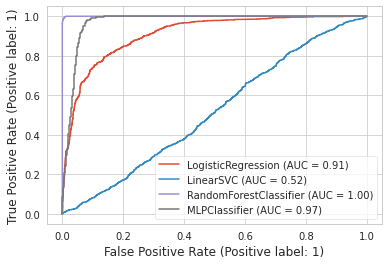

In [ ]:
#ROC (Receiver Operating Characteristic) curves & ROC AUC scores for

#1. Logistic Regression Model
g1 = plot_roc_curve(model1, X_test, y_test)
y_prob_pred1 = model1.predict_proba(X_test)[:,1]
A1 = round(roc_auc_score(y_test, y_prob_pred1), 2)

#2. Support Vector Classifier
g2 = plot_roc_curve(model2, X_test_kernelised, y_test, ax = g1.ax_)
A2 = 0.52

#3. Random Forest Classifier
g3 = plot_roc_curve(model3, X_test, y_test, ax = g1.ax_)
y_prob_pred3 = model3.predict_proba(X_test)[:,1]
A3 = round(roc_auc_score(y_test, y_prob_pred3), 2)

#4. Neural Network Classifier
g4 = plot_roc_curve(model4, X_test, y_test, ax = g1.ax_)
y_prob_pred4 = model4.predict_proba(X_test)[:,1]
A4 = round(roc_auc_score(y_test, y_prob_pred4), 2)

p5 = [A1, A2, A3, A4]

In [ ]:
#Confusion Matrices for 

#1. Logistic Regression Model
print("Confusion matrix: Logistic Regression")
print(pd.DataFrame(conf_matrix1))

#2. Support Vector Classifier
print("Confusion matrix: Support Vector Classifier")
print(pd.DataFrame(conf_matrix2))

#3. Random Forest Classifier
print("Confusion matrix: Random forest Classifier")
print(pd.DataFrame(conf_matrix3))

#4. Neural Network Classifier
print("Confusion matrix: Neural Networks")
print(pd.DataFrame(conf_matrix4))

Confusion matrix: Logistic Regression
      0     1
0  1848   229
1   472  1444
Confusion matrix: Support Vector Classifier
     0     1
0  827  1250
1  674  1242
Confusion matrix: Random forest Classifier
      0     1
0  1928   149
1     0  1916
Confusion matrix: Neural Networks
      0     1
0  1820   299
1   175  1699


In [ ]:
#Performance of all four models
performance = pd.DataFrame(list(zip(p1, p2, p3, p4)))
performance.loc[4] = p5
performance.index = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']
performance.columns = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classsifier', 'Neural Networks']
performance

,Logistic Regression,Support Vector Classifier,Random Forest Classsifier,Neural Networks
Accuracy,0.824443,0.518157,0.962685,0.944653
Precision,0.863120,0.498395,0.927845,0.910810
Recall,0.753653,0.648225,1.000000,0.980689
F1 score,0.804681,0.563521,0.962572,0.944458
AUC,0.910000,0.530000,1.000000,0.970000


**Including only important variables**

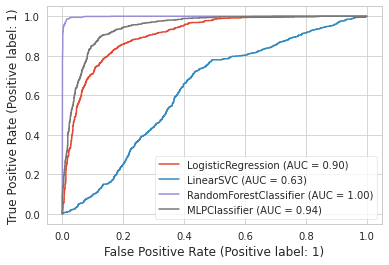

In [ ]:
#ROC (Receiver Operating Characteristic) curves & ROC AUC scores for

#1. Logistic Regression Model
g1 = plot_roc_curve(modelp1, X_pca_test, y_pca_test)
y_pca_prob_pred1 = modelp1.predict_proba(X_pca_test)[:,1]
A1 = round(roc_auc_score(y_pca_test, y_pca_prob_pred1), 2)

#2. Support Vector Classifier
g2 = plot_roc_curve(modelp2, X_pca_test_kernelised, y_pca_test, ax = g1.ax_)
A2 = 0.63

#3. Random Forest Classifier
g3 = plot_roc_curve(modelp3, X_pca_test, y_pca_test, ax = g1.ax_)
y_pca_prob_pred3 = modelp3.predict_proba(X_pca_test)[:,1]
A3 = round(roc_auc_score(y_pca_test, y_pca_prob_pred3), 2)

#4. Neural Network Classifier
g4 = plot_roc_curve(modelp4, X_pca_test, y_pca_test, ax = g1.ax_)
y_pca_prob_pred4 = modelp4.predict_proba(X_pca_test)[:,1]
A4 = round(roc_auc_score(y_pca_test, y_pca_prob_pred4), 2)

pc5 = [A1, A2, A3, A4]

In [ ]:
#Confusion Matrices for 

#1. Logistic Regression Model
print("Confusion matrix: Logistic Regression")
print(pd.DataFrame(conf_matrixp1))

#2. Support Vector Classifier
print("Confusion matrix: Support Vector Classifier")
print(pd.DataFrame(conf_matrixp2))

#3. Random Forest Classifier
print("Confusion matrix: Random forest Classifier")
print(pd.DataFrame(conf_matrixp3))

#4. Neural Network Classifier
print("Confusion matrix: Neural Networks")
print(pd.DataFrame(conf_matrixp4))

Confusion matrix: Logistic Regression
      0     1
0  1900   219
1   529  1345
Confusion matrix: Support Vector Classifier
      0     1
0  1212   907
1   563  1311
Confusion matrix: Random forest Classifier
      0     1
0  1939   180
1     2  1872
Confusion matrix: Neural Networks
      0     1
0  1893   184
1    37  1879


In [ ]:
#Performance of all four models
performance = pd.DataFrame(list(zip(pc1, pc2, pc3, pc4)))
performance.loc[4] = pc5
performance.index = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']
performance.columns = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classsifier', 'Neural Networks']
performance

,Logistic Regression,Support Vector Classifier,Random Forest Classsifier,Neural Networks
Accuracy,0.812672,0.631856,0.954420,0.881292
Precision,0.859974,0.591073,0.912281,0.850350
Recall,0.717716,0.699573,0.998933,0.906617
F1 score,0.782432,0.640762,0.953642,0.877583
AUC,0.900000,0.530000,1.000000,0.940000


### **Inferences**

I. When all variables are used:

1. The Random Forest (RF) Classifier has the best Accuracy, Precision, Recall, F1 score, and ROC AUC score when compared to the other three models. Neural networks (NN) classifier is very close to the Random Forest Classifier in all aspects.
2. Logistic Regression (LR) model has good accuracy, precision, and ROC AUC score but its recall and F1 score are much lesser than the RF classifier and the NN classifier.
3. Support vector classifier has bad Accuracy, Precision, Recall, F1 score and ROC AUC score when compared to the other three models.

II. When only important variables are used:

1. The Random Forest (RF) Classifier has the best Accuracy, Precision, Recall, F1 score, and ROC AUC score when compared to the other three models. Neural networks (NN) classifier is close to the Random Forest Classifier in all aspects.
2. The logisitc Regression model has good Accuracy, Precision, ROC AUC score, but Recall and F1 scores are much lesser than the RF classifier and the NN classifier.
3. Support vector classifier has very less Accuracy, Precision, Recall, F1 score and ROC AUC score when compared to the other three models.

III. Effect of dropping all variables other than the important variables: 

1. All aspects in the RF classifier are very close in both cases. All aspects in the LR & the NN classifiers are either less or very close (ROC AUC score in both LR model & NN classifier. Accuracy & Precision in LR model) when only important variables are used.
2. In SVC, most of the aspects differ significantly from each other. All of them are higher when only important variables are used.

The Random forest classifier is best among the four models. If memory and time are concerned then it won't be a bad idea to consider only the important variables for the model since all of the performance metrics are close in both the cases. 

There is a significant increase (except in SV classifier) in the performance metrics after decreasing the imbalance in the data

## **References**

https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue


https://stackoverflow.com/questions/57981287/display-percent-of-100-in-stacked-bar-plot-from-crosstab-from-matplotlib-in-pand


https://pandas.pydata.org/docs/user_guide/index.html


https://scikit-learn.org/stable/index.html


https://numpy.org/doc/stable/


https://thedigitalskye.com/2021/04/19/6-useful-metrics-to-evaluate-binary-classification-models/


https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/


https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa


https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
